In [4]:
import os
import keras
import seaborn as sns
import tensorflow as tf
from keras import layers, applications, models
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [2]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
size = (64, 64)

# Normalize image color values
datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 20,       # Rotate images up to 20 degrees
    width_shift_range = 0.2,   # Shift width by 20%
    height_shift_range = 0.2,  # Shift height by 20%
    shear_range = 0.2,         # Shear distortion
    zoom_range = 0.2,          # Zoom into images
    horizontal_flip = True,    # Flip images horizontally
    fill_mode = "nearest"      # Fill missing pixels with nearest values
)

# Specify path, target shape, batch size, classifier output, color mode, and shuffle
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size = size,
    batch_size = 32,
    class_mode ='binary',
    color_mode = 'rgb',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    '../data/test',
    target_size = size,
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = False
)

Found 20001 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [5]:
# Load trained model
base_model = applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(64, 64, 3)
)

2025-02-11 19:23:18.852783: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-02-11 19:23:18.852973: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-11 19:23:18.852983: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1739319798.853615 2212360 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739319798.853702 2212360 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Freeze layers
base_model.trainable = False

In [7]:
# Setup pre-trained feature extractor
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.5),  # Regularization
    layers.Dense(1, activation = "sigmoid")  # Binary classification
])

In [8]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [10]:
history = model.fit(
    train_generator,
    epochs = 30,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/30


/Users/langtowl/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-02-11 19:26:34.073715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


626/626 - 45s - 72ms/step - accuracy: 0.6826 - loss: 0.7009 - val_accuracy: 0.7754 - val_loss: 0.4757
Epoch 2/30


626/626 - 40s - 64ms/step - accuracy: 0.7362 - loss: 0.5263 - val_accuracy: 0.7880 - val_loss: 0.4524
Epoch 3/30


626/626 - 41s - 65ms/step - accuracy: 0.7539 - loss: 0.5043 - val_accuracy: 0.7970 - val_loss: 0.4400
Epoch 4/30


626/626 - 40s - 64ms/step - accuracy: 0.7572 - loss: 0.4936 - val_accuracy: 0.7978 - val_loss: 0.4343
Epoch 5/30


626/626 - 41s - 65ms/step - accuracy: 0.7586 - loss: 0.4936 - val_accuracy: 0.7994 - val_loss: 0.4265
Epoch 6/30
626/626 - 41s - 65ms/step - accuracy: 0.7606 - loss: 0.4919 - val_accuracy: 0.7948 - val_loss: 0.4381
Epoch 7/30


626/626 - 41s - 65ms/step - accuracy: 0.7615 - loss: 0.4906 - val_accuracy: 0.8008 - val_loss: 0.4205
Epoch 8/30
626/626 - 40s - 64ms/step - accuracy: 0.7657 - loss: 0.4865 - val_accuracy: 0.7946 - val_loss: 0.4362
Epoch 9/30


626/626 - 41s - 65ms/step - accuracy: 0.7654 - loss: 0.4872 - val_accuracy: 0.8070 - val_loss: 0.4163
Epoch 10/30
626/626 - 40s - 64ms/step - accuracy: 0.7656 - loss: 0.4810 - val_accuracy: 0.8084 - val_loss: 0.4186
Epoch 11/30
626/626 - 41s - 65ms/step - accuracy: 0.7644 - loss: 0.4853 - val_accuracy: 0.8078 - val_loss: 0.4208
Epoch 12/30
626/626 - 41s - 65ms/step - accuracy: 0.7659 - loss: 0.4855 - val_accuracy: 0.8062 - val_loss: 0.4176
Epoch 13/30
626/626 - 41s - 65ms/step - accuracy: 0.7640 - loss: 0.4870 - val_accuracy: 0.8040 - val_loss: 0.4196
Epoch 14/30


626/626 - 41s - 66ms/step - accuracy: 0.7696 - loss: 0.4830 - val_accuracy: 0.8128 - val_loss: 0.4137
Epoch 15/30
626/626 - 41s - 65ms/step - accuracy: 0.7614 - loss: 0.4907 - val_accuracy: 0.8018 - val_loss: 0.4342
Epoch 16/30
626/626 - 41s - 65ms/step - accuracy: 0.7686 - loss: 0.4813 - val_accuracy: 0.8078 - val_loss: 0.4163
Epoch 17/30
626/626 - 41s - 65ms/step - accuracy: 0.7684 - loss: 0.4799 - val_accuracy: 0.8024 - val_loss: 0.4330
Epoch 18/30
626/626 - 40s - 64ms/step - accuracy: 0.7694 - loss: 0.4780 - val_accuracy: 0.7978 - val_loss: 0.4338
Epoch 19/30


626/626 - 40s - 64ms/step - accuracy: 0.7602 - loss: 0.4891 - val_accuracy: 0.8114 - val_loss: 0.4119
Epoch 20/30
626/626 - 41s - 66ms/step - accuracy: 0.7730 - loss: 0.4787 - val_accuracy: 0.7972 - val_loss: 0.4328
Epoch 21/30
626/626 - 40s - 65ms/step - accuracy: 0.7676 - loss: 0.4784 - val_accuracy: 0.8090 - val_loss: 0.4177
Epoch 22/30


626/626 - 41s - 65ms/step - accuracy: 0.7666 - loss: 0.4795 - val_accuracy: 0.8074 - val_loss: 0.4106
Epoch 23/30
626/626 - 41s - 65ms/step - accuracy: 0.7663 - loss: 0.4855 - val_accuracy: 0.8080 - val_loss: 0.4192
Epoch 24/30


626/626 - 40s - 64ms/step - accuracy: 0.7704 - loss: 0.4814 - val_accuracy: 0.8128 - val_loss: 0.4043
Epoch 25/30
626/626 - 40s - 63ms/step - accuracy: 0.7665 - loss: 0.4892 - val_accuracy: 0.8080 - val_loss: 0.4138
Epoch 26/30
626/626 - 39s - 63ms/step - accuracy: 0.7697 - loss: 0.4825 - val_accuracy: 0.8010 - val_loss: 0.4325
Epoch 27/30
626/626 - 39s - 62ms/step - accuracy: 0.7683 - loss: 0.4805 - val_accuracy: 0.8116 - val_loss: 0.4067
Epoch 28/30
626/626 - 39s - 63ms/step - accuracy: 0.7620 - loss: 0.4890 - val_accuracy: 0.7884 - val_loss: 0.4541
Epoch 29/30
626/626 - 38s - 61ms/step - accuracy: 0.7648 - loss: 0.4852 - val_accuracy: 0.8102 - val_loss: 0.4107


In [11]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

157/157 - 6s - 41ms/step - accuracy: 0.8128 - loss: 0.4043
Test loss: 0.40427228808403015
Test accuracy: 0.8127625584602356


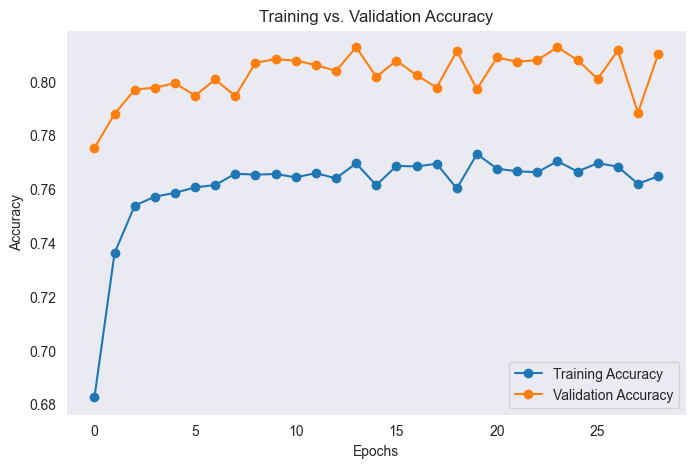

In [12]:
# Plot training vs validation accuracy
plt.figure(figsize = (8, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Get true labels
true_labels = test_generator.classes

In [13]:
# Get predictions
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step


In [18]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

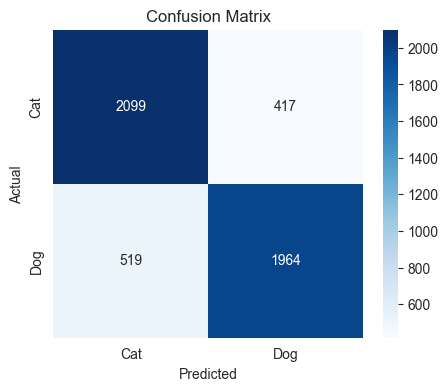

              precision    recall  f1-score   support

         Cat       0.80      0.83      0.82      2516
         Dog       0.82      0.79      0.81      2483

    accuracy                           0.81      4999
   macro avg       0.81      0.81      0.81      4999
weighted avg       0.81      0.81      0.81      4999



In [19]:
# Display confusion matrix
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Cat", "Dog"], yticklabels = ["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(true_labels, pred_labels, target_names = ["Cat", "Dog"]))